## Case study of using BF file

This notebook utilizes Case_rgb.py Case_spectral.py and Case_WhereAreWeLooking.py files under the same folder.  
However, this notebook could be one step further showing more cases using the same approach.

In [31]:
from my_module import np, plt, Basemap, Polygon, toimage
import my_module.data.basic_fusion as bf
from my_module.plot import enhance_rgb, scale_image_2d
from IPython.display import HTML

__Define__ a function showing the observing area of MODIS, MISR, and ASTER, based on the lats/lons for four corners of a block/granule.

In [2]:
def draw_screen_poly( lats, lons, m, facecolor ):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( xy, facecolor=facecolor, alpha=0.4 )
    plt.gca().add_patch(poly)

### Case 1. Iceland volcano eruption in May 3rd, 2010  
Here we show 4 MODIS granules, 4 MISR blocks but the eruption is in the 2nd MODIS granule and 3rd MISR block. We will zoom in in the following to see the details.

In [44]:
bf_file = '/u/sciteam/smzyz/scratch/data/BasicFusion/TERRA_BF_L1B_O55180_20100503123308_F000_V001.h5'

granule_MOPITT = 'granule_20100503'
granule_ASTER = 'granule_05032010130341'
block_MISR_0 = 36
block_MISR_1 = 37
block_MISR_2 = 38
block_MISR_3 = 39
granule_MODIS_1 = 'granule_2010123_1255'
granule_MODIS_2 = 'granule_2010123_1300'
granule_MODIS_3 = 'granule_2010123_1305'
granule_MODIS_4 = 'granule_2010123_1310'

/mnt/bwpy/single/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/mnt/bwpy/single/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/mnt/bwpy/single/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/mnt/bwpy/single/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/mnt/bwpy/single/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold

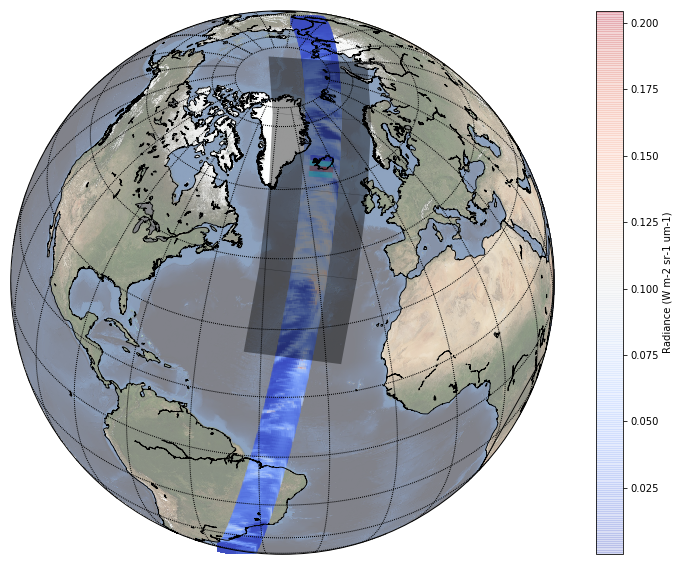

In [4]:
rad, lat, lon = bf.get_rad_latlon(bf_file, 'MOPITT', granule_MOPITT)
rad_avg = rad[:, :, :, 5].ravel()
lat_flat = lat.ravel()
lon_flat = lon.ravel()
idx_valid = np.where(rad_avg > 0)[0]
rad_valid = rad_avg[idx_valid]
lat_valid = lat_flat[idx_valid]
lon_valid = lon_flat[idx_valid]

plt.figure(figsize=(15, 10))
m = Basemap(projection='ortho',lon_0=-40,lat_0=40,resolution='l')
m.drawcoastlines(color='k', linewidth=0.9)
m.drawmeridians(np.arange(-180.,181,15.))
m.drawparallels(np.arange(90.,-81,-15.))
m.bluemarble(alpha=0.5)
im = m.scatter(lon_valid[:],lat_valid[:],c=rad_valid[:],latlon=True,marker='s',s=55, 
                cmap='coolwarm', alpha=0.2)
plt.colorbar(im, orientation='vertical', label='Radiance (W m-2 sr-1 um-1)')


lats, lons = bf.get_bounding_latlon(bf_file, 'ASTER', granule_ASTER)
draw_screen_poly( lats, lons, m, 'red' )

lats, lons = bf.get_bounding_latlon(bf_file, 'MISR', block_MISR_0)
draw_screen_poly( lats, lons, m, 'blue' ) 
lats, lons = bf.get_bounding_latlon(bf_file, 'MISR', block_MISR_1)
draw_screen_poly( lats, lons, m, 'cyan' ) 
lats, lons = bf.get_bounding_latlon(bf_file, 'MISR', block_MISR_2)
draw_screen_poly( lats, lons, m, 'brown' )
lats, lons = bf.get_bounding_latlon(bf_file, 'MISR', block_MISR_3)
draw_screen_poly( lats, lons, m, 'cyan' ) 

lats, lons = bf.get_bounding_latlon(bf_file, 'MODIS', granule_MODIS_1)
draw_screen_poly( lats, lons, m, 'black' )
lats, lons = bf.get_bounding_latlon(bf_file, 'MODIS', granule_MODIS_2)
draw_screen_poly( lats, lons, m, 'black' ) 
lats, lons = bf.get_bounding_latlon(bf_file, 'MODIS', granule_MODIS_3)
draw_screen_poly( lats, lons, m, 'black' ) 
lats, lons = bf.get_bounding_latlon(bf_file, 'MODIS', granule_MODIS_4)
draw_screen_poly( lats, lons, m, 'black' ) 

plt.show()

### RGB images  
In the following, RGB images are shown for ASTER, MISR, and MODIS.  
Enlarged radiances is shown for MOPITT using a scatter plot.

In [45]:
granule_ASTER = 'granule_05032010130341'
granule_MODIS = 'granule_2010123_1300'
block_MISR = [38]
camera_MISR = 'AN'
granule_MOPITT = 'granule_20100503'
band_MOPITT = 5


__ASTER__

>> Retrieving ASTER RGB, granule: granule_05032010130341.


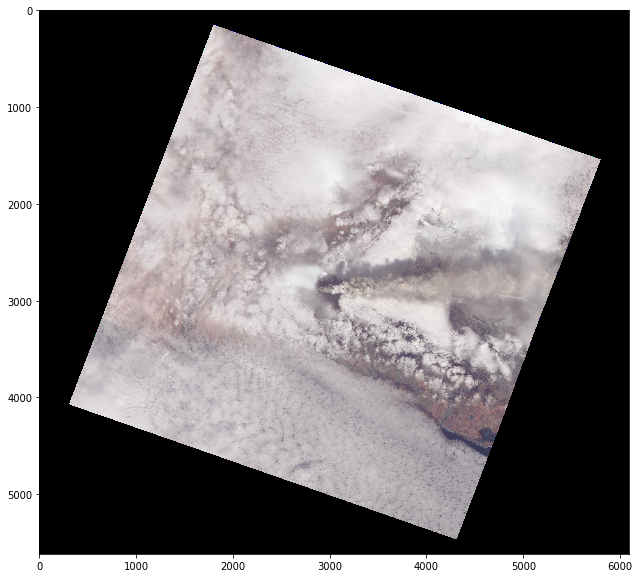

In [6]:
ASTER_rgb = bf.get_rgb(bf_file, 'ASTER', granule_ASTER)
ASTER_enhanced_rgb = enhance_rgb(ASTER_rgb)

plt.figure(figsize=(15, 10))
plt.imshow(ASTER_enhanced_rgb)
plt.show()
# toimage(ASTER_enhanced_rgb).save('ASTER_rgb.png')

__MISR__

>> Retrieving MISR RGB, camera: AN, block: [38].
(512, 2048)


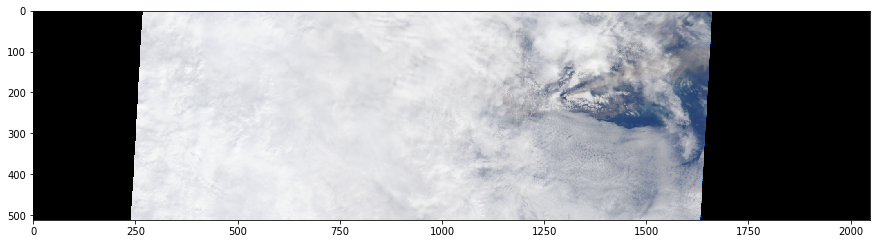

In [7]:
MISR_rgb = bf.get_rgb(bf_file, 'MISR', block_MISR, camera=camera_MISR)
MISR_enhanced_rgb = enhance_rgb(MISR_rgb)

plt.figure(figsize=(15, 10))
plt.imshow(MISR_enhanced_rgb)
plt.show()

In [27]:
for i, icam in enumerate(["DF", "CF", "BF", "AF", "AN_1km", "AA", "BA", "CA", "DA"]):
    MISR_red, _, _ = bf.get_rad_latlon(bf_file, 'MISR', block_MISR[0], band='Red', camres=icam)
    MISR_enhanced_red = scale_image_2d(MISR_red, method='RLT', scale_factor=2)
#     MISR_rgb = bf.get_rgb(bf_file, 'MISR', block_MISR, camera=icam)
#     MISR_enhanced_rgb = enhance_rgb(MISR_rgb, scale_method='RLT', scale_factors=[1, 1, 1])

    toimage(MISR_enhanced_red).save("{}.png".format(i))

/mnt/bwpy/single/usr/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


In [32]:
HTML('<img src="volcano_MISR.gif">')

__MODIS__

>> Retrieving USER-DEFINED MODIS RGB, granule: granule_2010123_1300.
>> Red: band 1, Green: band 4, Blue: band 3


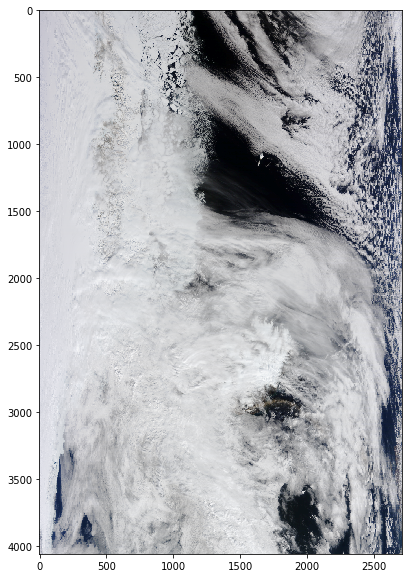

In [8]:
MODIS_rgb = bf.get_rgb(bf_file, 'MODIS', granule_MODIS, customize_rgb_bands=[1, 4, 3])
MODIS_enhanced_rgb = enhance_rgb(MODIS_rgb)

plt.figure(figsize=(15, 10))
plt.imshow(MODIS_enhanced_rgb)
plt.show()

>> Retrieving USER-DEFINED MODIS RGB, granule: granule_2010123_1300.
>> Red: band 2, Green: band 22, Blue: band 31


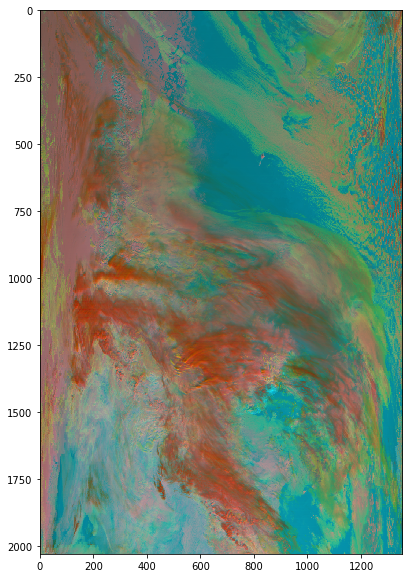

In [9]:
MODIS_rgb = bf.get_rgb(bf_file, 'MODIS', granule_MODIS, customize_rgb_bands=[2, 22, 31])
MODIS_enhanced_rgb = enhance_rgb(MODIS_rgb, scale_method='RLT', scale_factors=[1, 2.5, 1])

plt.figure(figsize=(15, 10))
plt.imshow(MODIS_enhanced_rgb)
plt.show()

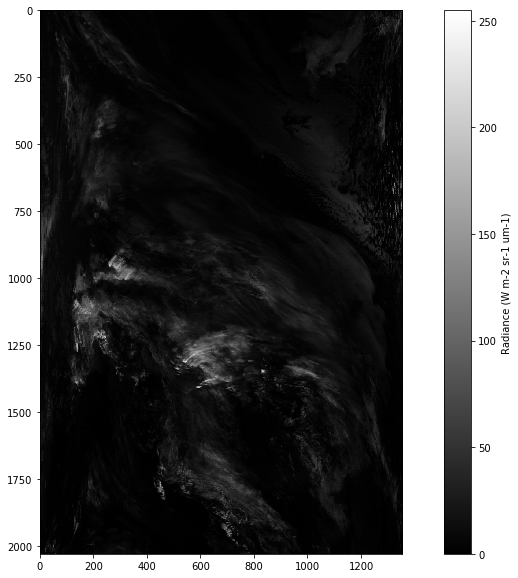

In [55]:
MODIS_spectral, _, _ = bf.get_rad_latlon(bf_file, 'MODIS', granule_MODIS, band=26)
MODIS_enhanced_spectral = scale_image_2d(MODIS_spectral, method='RLT', scale_factor=1)

plt.figure(figsize=(15, 10))
plt.imshow(MODIS_enhanced_spectral, cmap='gray')
plt.colorbar(orientation='vertical', label='Radiance (W m-2 sr-1 um-1)')
plt.show()

__MOPITT__

/mnt/bwpy/single/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/mnt/bwpy/single/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


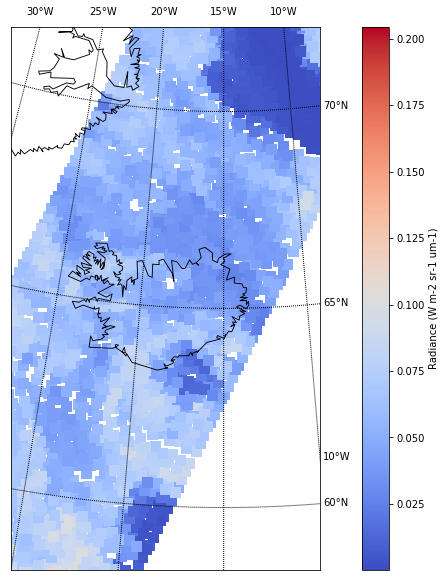

In [53]:
rad, lat, lon = bf.get_rad_latlon(bf_file, 'MOPITT', granule_MOPITT)
rad_avg = rad[:, :, :, band_MOPITT].ravel()
lat_flat = lat.ravel()
lon_flat = lon.ravel()
idx_valid = np.where(rad_avg > 0)[0]
rad_valid = rad_avg[idx_valid]
lat_valid = lat_flat[idx_valid]
lon_valid = lon_flat[idx_valid]

plt.figure(figsize=(15, 10))
m = Basemap(projection='stere',lon_0=-15,lat_0=80.,lat_ts=30,\
            llcrnrlat=58,urcrnrlat=72,\
            llcrnrlon=-25,urcrnrlon=-7,\
            rsphere=6371200.,resolution='l',area_thresh=10000)
m.drawcoastlines(color='k', linewidth=0.9)
m.drawmeridians(np.arange(-180.,181,5.), labels=[False,True,True,False])
m.drawparallels(np.arange(90.,-81,-5.), labels=[False,True,True,False])
# m.bluemarble(alpha=0.2)
im = m.scatter(lon_valid[:],lat_valid[:],c=rad_valid[:],latlon=True,marker='s',s=100, 
                cmap='coolwarm', alpha=1.0)
plt.colorbar(im, orientation='vertical', label='Radiance (W m-2 sr-1 um-1)')
plt.show()

### Case 2. Amazon biomass burning on August 19th, 2000  
Since I fogot the orbit information, I will first retrieve those information using bf.bf_info function.

In [56]:
bf_file = '/u/sciteam/smzyz/scratch/data/BasicFusion/TERRA_BF_L1B_O3571_20000819133750_F000_V001.h5'

#bf.bf_info(bf_file, 'ASTER')

### Overall

In [37]:
granule_MOPITT = 'granule_20000819'
granule_ASTER = 'granule_08192000142910'
block_MISR_0 = 99
granule_MODIS_1 = 'granule_2000232_1425'


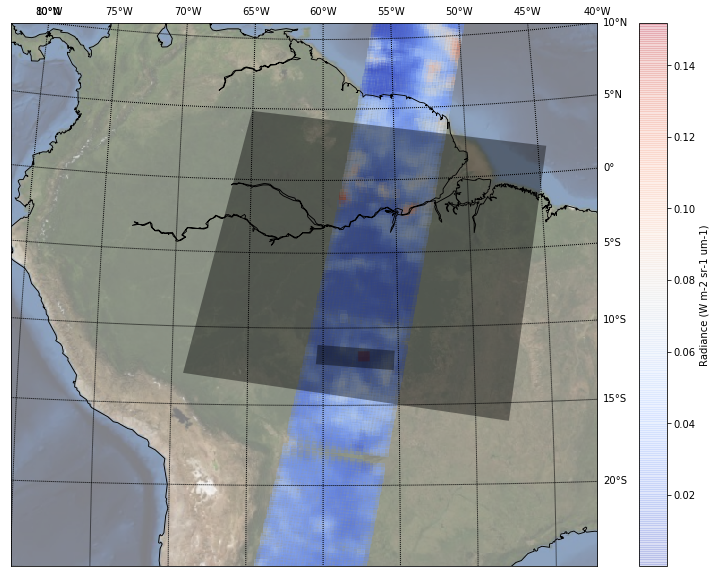

In [61]:
rad, lat, lon = bf.get_rad_latlon(bf_file, 'MOPITT', granule_MOPITT)
rad_avg = rad[:, :, :, 5].ravel()
lat_flat = lat.ravel()
lon_flat = lon.ravel()
idx_valid = np.where(rad_avg > 0)[0]
rad_valid = rad_avg[idx_valid]
lat_valid = lat_flat[idx_valid]
lon_valid = lon_flat[idx_valid]

plt.figure(figsize=(15, 10))

# m = Basemap(projection='ortho',lon_0=-60,lat_0=-20,resolution='l')
# m.drawmeridians(np.arange(-180.,181,15.))
# m.drawparallels(np.arange(90.,-81,-15.))
m = Basemap(projection='stere',lon_0=-60,lat_0=30,lat_ts=30,\
            llcrnrlat=-25,urcrnrlat=10,\
            llcrnrlon=-80,urcrnrlon=-40,\
            rsphere=6371200.,resolution='l',area_thresh=10000)
m.drawmeridians(np.arange(-180.,181,5.), labels=[False,True,True,False])
m.drawparallels(np.arange(90.,-81,-5.), labels=[False,True,True,False])

m.drawcoastlines(color='k', linewidth=0.9)
m.bluemarble(alpha=0.5)
im = m.scatter(lon_valid[:],lat_valid[:],c=rad_valid[:],latlon=True,marker='s',s=55, 
                cmap='coolwarm', alpha=0.2)
plt.colorbar(im, orientation='vertical', label='Radiance (W m-2 sr-1 um-1)')


lats, lons = bf.get_bounding_latlon(bf_file, 'ASTER', granule_ASTER)
draw_screen_poly( lats, lons, m, 'brown' )

lats, lons = bf.get_bounding_latlon(bf_file, 'MISR', block_MISR_0)
draw_screen_poly( lats, lons, m, 'black' )  

lats, lons = bf.get_bounding_latlon(bf_file, 'MODIS', granule_MODIS_1)
draw_screen_poly( lats, lons, m, 'black' )

plt.show()

### RGB

In [35]:
granule_ASTER = 'granule_08192000142945'
granule_MODIS = 'granule_2000232_1425'
block_MISR = [99]
camera_MISR = 'AN'
granule_MOPITT = 'granule_20100503'
band_MOPITT = 5

__MODIS__

>> Retrieving USER-DEFINED MODIS RGB, granule: granule_2000232_1425.
>> Red: band 1, Green: band 4, Blue: band 3


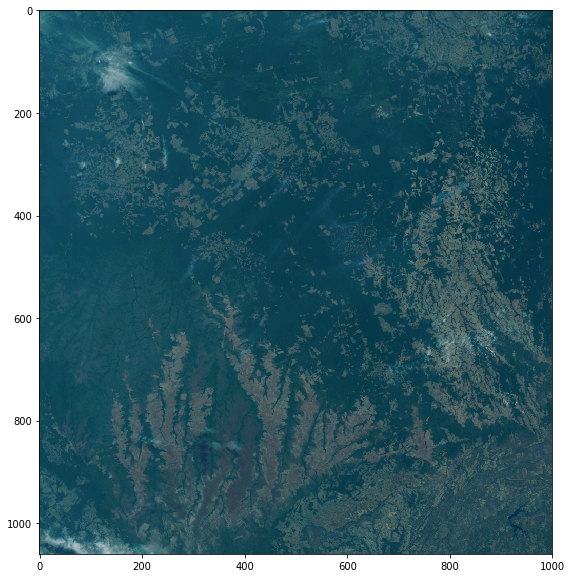

In [10]:
MODIS_rgb = bf.get_rgb(bf_file, 'MODIS', granule_MODIS, customize_rgb_bands=[1, 4, 3])
MODIS_enhanced_rgb = enhance_rgb(MODIS_rgb)

plt.figure(figsize=(15, 10))
plt.imshow(MODIS_enhanced_rgb[3000:, 1000:2000])
plt.show()

### MISR

>> Retrieving MISR RGB, camera: AN, block: [99].
(512, 2048)


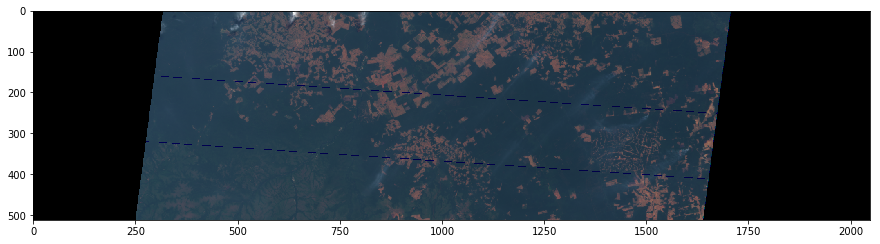

In [15]:
MISR_rgb = bf.get_rgb(bf_file, 'MISR', block_MISR, camera=camera_MISR)
MISR_enhanced_rgb = enhance_rgb(MISR_rgb, scale_method='RLT', scale_factors=[1, 1, 1])

plt.figure(figsize=(15, 10))
plt.imshow(MISR_enhanced_rgb)
plt.show()

In [28]:
for i, icam in enumerate(["DF", "CF", "BF", "AF", "AN_1km", "AA", "BA", "CA", "DA"]):
#     MISR_red, _, _ = bf.get_rad_latlon(bf_file, 'MISR', block_MISR[0], band='Red', camres=icam)
#     MISR_enhanced_red = scale_image_2d(MISR_red, method='RLT', scale_factor=2)
    MISR_rgb = bf.get_rgb(bf_file, 'MISR', block_MISR, camera=icam)
    MISR_enhanced_rgb = enhance_rgb(MISR_rgb, scale_method='RLT', scale_factors=[1, 1, 1])

    toimage(MISR_enhanced_rgb).save("{}.png".format(i))

>> Retrieving MISR RGB, camera: DF, block: [99].


/mnt/bwpy/single/usr/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


>> Retrieving MISR RGB, camera: CF, block: [99].
>> Retrieving MISR RGB, camera: BF, block: [99].
>> Retrieving MISR RGB, camera: AF, block: [99].
>> Retrieving MISR RGB, camera: AN_1km, block: [99].
>> Retrieving MISR RGB, camera: AA, block: [99].
>> Retrieving MISR RGB, camera: BA, block: [99].
>> Retrieving MISR RGB, camera: CA, block: [99].
>> Retrieving MISR RGB, camera: DA, block: [99].


In [33]:
HTML('<img src="amazon_MISR.gif">')

### ASTER

In [38]:
from my_module import h5py

h5f = h5py.File(bf_file, 'r')

r = h5f['/ASTER/{}/VNIR/ImageData3N'.format(granule_ASTER)][:]
g = h5f['/ASTER/{}/VNIR/ImageData2'.format(granule_ASTER)][:]
b = h5f['/ASTER/{}/VNIR/ImageData1'.format(granule_ASTER)][:]
    
np.place(r, (r<0)|(g<0)|(b<0), 0)
np.place(g, (r<0)|(g<0)|(b<0), 0)
np.place(b, (r<0)|(g<0)|(b<0), 0)

rgb = []
rgb.append(r)
rgb.append(g)
rgb.append(b)
rgb = np.rollaxis(np.array(rgb), 0, 3)

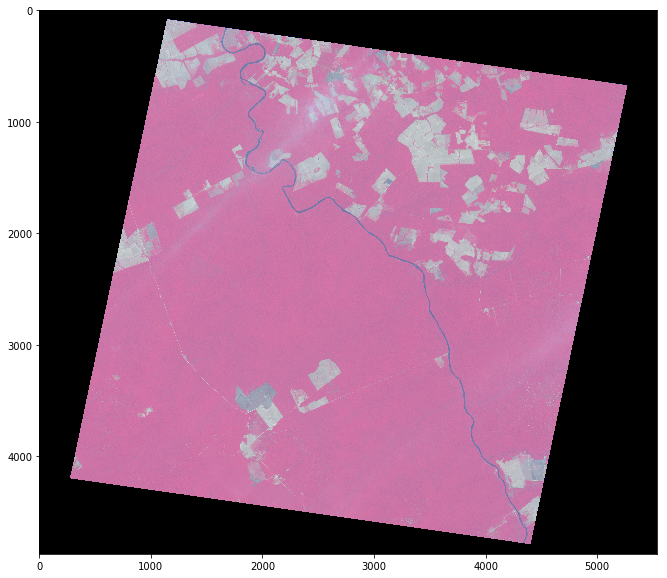

In [39]:
ASTER_rgb = rgb
ASTER_enhanced_rgb = enhance_rgb(ASTER_rgb)

plt.figure(figsize=(15, 10))
plt.imshow(ASTER_enhanced_rgb)
plt.show()
# toimage(ASTER_enhanced_rgb).save('ASTER_rgb.png')